In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
path1 = r"C:\Users\Ngan\Desktop\FRAUD_DETECTION\Fraud_Data.csv"
path2 = r"C:\Users\Ngan\Desktop\FRAUD_DETECTION\IpAddress_to_Country.csv"
newPath1 = path1.replace(os.sep, '/')
newPath2 = path2.replace(os.sep, '/')

In [3]:
data = pd.read_csv(newPath1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
ipAddress =  pd.read_csv(newPath2)

In [6]:
ipAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [7]:
data.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [8]:
data['ip_address'].values

array([7.32758369e+08, 3.50311388e+08, 2.62147382e+09, ...,
       2.74847052e+09, 3.60117471e+09, 4.10382451e+09])

In [9]:
ipAddress.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [10]:
data.loc[data['ip_address'] >= 732758368]

user_id          signup_time        purchase_time  purchase_value  \
0         22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
2          1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3        150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
5        159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6         50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7        360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8        159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
10       199700  2015-07-11 18:26:54  2015-10-28 21:59:40              13   
11        73884  2015-05-29 16:22:02  2015-06-16 05:45:58              58   
12        79203  2015-06-16 21:19:35  2015-06-21 03:29:59              18   
13       299320  2015-03-03 19:17:07  2015-04-05 12:32:36              50   
14        82931  2015-02-16 02:50:30  2015-04-16 00:56:47              15   
15        31383  2015-02-01 01:06:17  2015-03-24 10:17:58              58   
16        78986  2015-05-15 03:52:08  2015-08-11 02:29:47              57   
18       357386  2015-02-03 00:48:38  2015-03-24 18:27:23              40   
19       289172  2015-07-17 05:48:45  2015-11-12 22:08:11              46   
20       154699  2015-07-08 15:35:44  2015-07-20 00:11:52              24   
21       316355  2015-08-08 20:05:50  2015-10-03 02:21:46              47   
22       343378  2015-01-30 08:50:29  2015-04-22 15:11:45              47   
23       370338  2015-01-08 11:47:29  2015-03-29 20:46:44              25   
24       171711  2015-01-11 01:51:15  2015-01-11 01:51:16              52   
25        59780  2015-01-04 22:32:33  2015-01-16 01:13:43              31   
26       176129  2015-01-28 12:53:51  2015-01-29 23:21:43              37   
27       100886  2015-07-12 14:14:04  2015-07-29 07:41:26              54   
29       151705  2015-01-07 03:44:53  2015-01-07 03:44:54              48   
31       396746  2015-08-05 23:50:35  2015-08-14 12:08:55              56   
32       243817  2015-02-13 18:16:05  2015-04-23 17:44:27              72   
33       262245  2015-01-03 03:29:05  2015-02-26 23:23:55              38   
34       256743  2015-06-12 19:11:32  2015-07-11 06:42:08              33   
35       306604  2015-02-09 13:01:40  2015-02-22 06:55:32              53   
...         ...                  ...                  ...             ...   
151081   240824  2015-07-26 23:21:59  2015-07-29 08:13:49              22   
151082   305464  2015-01-07 09:06:55  2015-01-07 09:06:56              90   
151083   377130  2015-04-21 22:56:46  2015-06-08 12:41:32              15   
151084   364012  2015-04-08 06:34:11  2015-07-07 16:57:37              52   
151085    18585  2015-03-31 15:02:04  2015-07-16 21:14:30              47   
151086   294702  2015-04-09 08:15:43  2015-06-10 23:30:14              63   
151087   227146  2015-03-04 14:11:15  2015-07-02 03:25:01              21   
151088   183594  2015-07-13 21:22:02  2015-08-20 03:37:08              18   
151089   330979  2015-08-12 17:21:10  2015-12-03 00:00:58              43   
151090    82951  2015-05-28 08:31:52  2015-08-31 00:29:04              29   
151091   366926  2015-03-15 15:00:08  2015-04-21 18:34:05              26   
151092   370144  2015-05-12 03:51:56  2015-05-31 04:16:27              50   
151093    25306  2015-05-15 20:09:44  2015-07-08 14:21:19              38   
151094   154458  2015-01-06 05:16:28  2015-02-16 11:02:52              34   
151095   125907  2015-06-09 16:32:30  2015-08-14 00:02:20              41   
151096    27502  2015-04-14 23:43:03  2015-06-24 10:42:00              43   
151097   390963  2015-05-20 03:34:03  2015-07-21 19:25:38              16   
151098   318557  2015-04-10 01:36:49  2015-05-14 07:17:23              55   
151099   115473  2015-01-01 07:26:14  2015-01-01 07:26:15              61   
151100   313804  2015-02-07 14:31:07  2015-03-02 19:20:25              48   
1511

In [11]:
filterx= data.ip_address >= 732758368
filterx.value_counts()

True     124362
False     26750
Name: ip_address, dtype: int64

In [12]:
ipAddress.loc[ipAddress['country'] == 'Japan']

lower_bound_ip_address  upper_bound_ip_address country
5                 1.678131e+07                16785407   Japan
7                 1.679360e+07                16809983   Japan
16                1.685914e+07                16875519   Japan
44                1.710490e+07                17170431   Japan
61                1.815347e+07                18219007   Japan
65                1.893990e+07                19005439   Japan
80                2.110259e+07                21233663   Japan
82                2.149581e+07                22020095   Japan
88                2.411725e+07                24379391   Japan
925               2.348831e+08               234884095   Japan
932               2.349476e+08               234948607   Japan
933               2.349486e+08               234950655   Japan
940               2.350776e+08               235143167   Japan
942               2.354053e+08               235929599   Japan
948               2.415002e+08               241565695   Japan
951               2.415995e+08               241600511   Japan
956               2.416148e+08               241623039   Japan
962               2.432696e+08               243270655   Japan
966               2.432737e+08               243277823   Japan
968               2.432860e+08               243294207   Japan
969               2.432942e+08               243302399   Japan
973               2.435318e+08               243662847   Japan
979               2.439168e+08               243924991   Japan
985               2.474721e+08               247476223   Japan
986               2.474762e+08               247478271   Japan
987               2.474783e+08               247479295   Japan
993               2.474885e+08               247496703   Japan
997               2.475295e+08               247595007   Japan
1751              4.529848e+08               452985855   Japan
1755              4.529889e+08               452993023   Japan
...                        ...                     ...     ...
138681            3.739222e+09              3739287551   Japan
138682            3.739288e+09              3739353087   Japan
138683            3.739353e+09              3739484159   Japan
138684            3.739484e+09              3739549695   Japan
138685            3.739550e+09              3739566079   Japan
138686            3.739566e+09              3739570175   Japan
138689            3.739574e+09              3739582463   Japan
138690            3.739582e+09              3739615231   Japan
138691            3.739615e+09              3739680767   Japan
138693            3.739697e+09              3739713535   Japan
138694            3.739714e+09              3739746303   Japan
138720            3.742990e+09              3743006719   Japan
138735            3.743106e+09              3743107071   Japan
138736            3.743107e+09              3743109119   Japan
138741            3.743118e+09              3743119359   Japan
138743            3.743120e+09              3743121407   Japan
138750            3.743135e+09              3743135743   Japan
138756            3.743220e+09              3743252479   Japan
138759            3.743265e+09              3743268863   Japan
138763            3.743282e+09              3743283199   Japan
138783            3.749970e+09              3750232063   Japan
138792            3.752138e+09              3752138751   Japan
138794            3.752141e+09              3752148991   Japan
138796            3.752153e+09              3752157183   Japan
138814            3.755475e+09              3755737087   Japan
138817            3.755934e+09              3755966463   Japan
138819            3.755975e+09              3755975679   Japan
138820            3.755976e+09              3755976703   Japan
138824            3.755987e+09              3755988991   Japan
138827            3.755991e+09              3755999231   Japan

[3005 rows x 3 columns]

In [27]:
data['ip_address'] = data['ip_address'].astype(float)
ipAddress['lower_bound_ip_address'] = ipAddress['lower_bound_ip_address'].astype(float)
ipAddress['upper_bound_ip_address'] = ipAddress['upper_bound_ip_address'].astype(float)

In [28]:
def get_country(x):
    IP = ipAddress
    result = IP.loc[(IP['lower_bound_ip_address'] < x) & (IP['upper_bound_ip_address'] > x), 'country'].values
    if result.shape[0]>0:
        return result[0]
    else:
        return 'NA'

In [29]:
data['country'] = data.ip_address.map(get_country)
data.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States

In [39]:
df=data.reset_index()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
index             151112 non-null int64
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 15.0+ MB


In [41]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['usage_time'] = df['purchase_time'] - df['signup_time']
df['usage_time'] = df['usage_time'].apply(lambda x: x.total_seconds())

Overall fraud rate: 0.09364577267192546


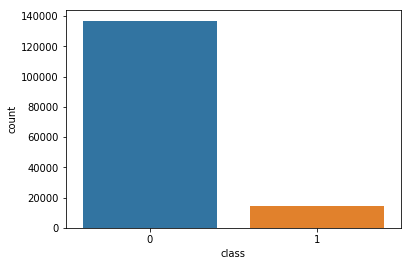

In [42]:
sns.countplot(x='class', data=df)
print('Overall fraud rate:', 1*df[df['class']==1].shape[0]/df.shape[0])

In [43]:
bool_series = df.ip_address.duplicated()
bool_series.value_counts()

False    143512
True       7600
Name: ip_address, dtype: int64

In [44]:
df1=df[bool_series]
df1.head()

index  user_id         signup_time       purchase_time  purchase_value  \
291     291    15551 2015-01-07 11:51:25 2015-01-07 11:51:26              11   
607     607   122969 2015-01-11 16:59:43 2015-01-11 16:59:44              38   
653     653   181613 2015-01-07 16:57:44 2015-05-06 12:04:04              15   
896     896   267103 2015-01-08 08:45:20 2015-01-08 08:45:21              10   
1007   1007   345811 2015-01-05 11:15:40 2015-01-05 11:15:41              29   

          device_id  source browser sex  age    ip_address  class  \
291   LCIDSXJYNIOGD     SEO      IE   M   30  1.447880e+09      1   
607   DABLZVBIMFUTE     Ads  Safari   F   28  2.747355e+09      1   
653   BWSMVSLCJXMCM  Direct      IE   F   39  2.937899e+09      0   
896   SUEKLSZWLASFR     Ads  Safari   M   24  1.886528e+09      1   
1007  QEZQNFJBMYJUS     SEO  Chrome   M   36  2.221020e+08      1   

            country  usage_time  
291          France         1.0  
607   United States         1.0  
653           Japan  10263980.0  
896           China         1.0  
1007  United States         1.0

In [45]:
#in 7600 ip_address duplicated, 6957 ip_address fraud
df1.groupby(['class']).count()

index  user_id  signup_time  purchase_time  purchase_value  device_id  \
class                                                                          
0        643      643          643            643             643        643   
1       6957     6957         6957           6957            6957       6957   

       source  browser   sex   age  ip_address  country  usage_time  
class                                                                
0         643      643   643   643         643      643         643  
1        6957     6957  6957  6957        6957     6957        6957

In [46]:
df.nunique()/df.shape[0]
#remove index,  user_id

index             1.000000
user_id           1.000000
signup_time       1.000000
purchase_time     0.997135
purchase_value    0.000807
device_id         0.912939
source            0.000020
browser           0.000033
sex               0.000013
age               0.000384
ip_address        0.949706
class             0.000013
country           0.001204
usage_time        0.949713
dtype: float64

In [47]:
print(df.isnull().sum()/len(df)*100)

index             0.0
user_id           0.0
signup_time       0.0
purchase_time     0.0
purchase_value    0.0
device_id         0.0
source            0.0
browser           0.0
sex               0.0
age               0.0
ip_address        0.0
class             0.0
country           0.0
usage_time        0.0
dtype: float64


In [25]:
# check all column value in df
for (columnName, columnData) in df.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)

Colunm Name :  index
Column Contents :  [     0      1      2 ... 151109 151110 151111]
Colunm Name :  user_id
Column Contents :  [ 22058 333320   1359 ... 368416 207709 138208]
Colunm Name :  signup_time
Column Contents :  ['2015-02-24T22:55:49.000000000' '2015-06-07T20:39:50.000000000'
 '2015-01-01T18:52:44.000000000' ... '2015-03-03T23:07:31.000000000'
 '2015-07-09T20:06:07.000000000' '2015-06-10T07:02:20.000000000']
Colunm Name :  purchase_time
Column Contents :  ['2015-04-18T02:47:11.000000000' '2015-06-08T01:38:54.000000000'
 '2015-01-01T18:52:45.000000000' ... '2015-05-20T07:07:47.000000000'
 '2015-09-07T09:34:46.000000000' '2015-07-21T02:03:53.000000000']
Colunm Name :  purchase_value
Column Contents :  [34 16 15 ... 40 46 20]
Colunm Name :  device_id
Column Contents :  ['QVPSPJUOCKZAR' 'EOGFQPIZPYXFZ' 'YSSKYOSJHPPLJ' ... 'MEQHCSJUBRBFE'
 'CMCXFGRHYSTVJ' 'ZINIADFCLHYPG']
Colunm Name :  source
Column Contents :  ['SEO' 'Ads' 'SEO' ... 'SEO' 'SEO' 'Direct']
Colunm Name :  browser

In [48]:
check_country_NA = df['country'] == 'NA'
check_country_NA.value_counts()
print('Country is NA rate:', 1*df[df['country']=='NA'].shape[0]/df.shape[0])

Country is NA rate: 0.1453623802212928


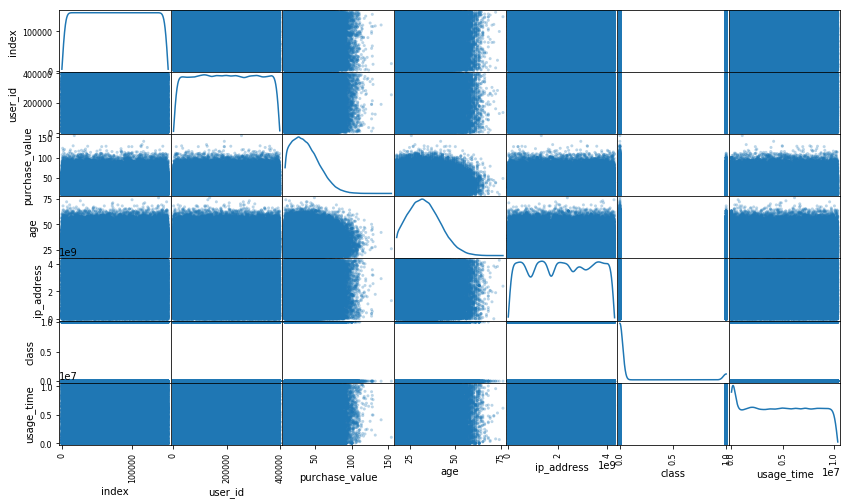

In [49]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
# def DrawCountplot(DataFrame, att, hatt="N/A"):
#   import matplotlib.pyplot as plt
#   import seaborn as sns
#   if(hatt == "N/A"):
#     sns.countplot(x=att, data=DataFrame)
#   else:
#     sns.countplot(x=att, hue=hatt, data=DataFrame)
#   plt.show()
# DrawCountplot(df, 'country', 'class')


In [51]:
deviceIdUsers = df.groupby('device_id')['user_id'].nunique()
deviceIdUsers = pd.DataFrame(deviceIdUsers).rename(columns={'device_id': 'device_id', 'user_id': 'device_id_unique_users'})
data1 = pd.merge(df, deviceIdUsers, how='left', on='device_id')
data1.head()

index  user_id         signup_time       purchase_time  purchase_value  \
0      0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1      1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2      2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3      3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4      4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   usage_time  device_id_unique_users  
0   4506682.0                       1  
1     17944.0                       1  
2         1.0                      12  
3    492085.0                       1  
4   4361461.0                       1

In [52]:
ipAddressUsers = df.groupby('ip_address')['user_id'].nunique()
ipAddressUsers = pd.DataFrame(ipAddressUsers).rename(columns={'ip_address':'ip_address','user_id':'ip_address_unique_users'})
data2 = pd.merge(data1, ipAddressUsers, how='left',  on='ip_address')
data2.head()

index  user_id         signup_time       purchase_time  purchase_value  \
0      0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1      1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2      2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3      3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4      4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   usage_time  device_id_unique_users  ip_address_unique_users  
0   4506682.0                       1                        1  
1     17944.0                       1                        1  
2         1.0                      12                       12  
3    492085.0                       1                        1  
4   4361461.0                       1                        1

In [53]:
countryCount = data2.groupby('country')['user_id'].agg({'country_count': 'size'})
countryCount = pd.DataFrame(countryCount)
data3 = pd.merge(data2, countryCount, how='left', on='country')
data3.head()

index  user_id         signup_time       purchase_time  purchase_value  \
0      0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1      1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2      2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3      3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4      4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   usage_time  device_id_unique_users  ip_address_unique_users  country_count  
0   4506682.0                       1                        1           7306  
1     17944.0                       1                        1          58049  
2         1.0                      12                       12          58049  
3    492085.0                       1                        1          21966  
4   4361461.0                       1                        1          58049

In [54]:
sourceCount = df.groupby(['source','class'])['user_id'].count()
sourceCount

source  class
Ads     0        54368
        1         5513
Direct  0        27390
        1         3226
SEO     0        55203
        1         5412
Name: user_id, dtype: int64

In [55]:
countryCount1 = df.groupby(['country','class'])['user_id'].count()
countryCount1

country                class
Afghanistan            0            5
                       1            1
Albania                0           13
Algeria                0          109
                       1           13
Angola                 0           23
                       1            1
Antigua and Barbuda    0            3
Argentina              0          595
                       1           66
Armenia                0           13
                       1            2
Australia              0         1679
                       1          165
Austria                0          402
                       1           33
Azerbaijan             0           21
                       1            2
Bahamas                0            4
Bahrain                0           14
Bangladesh             0           34
                       1            3
Barbados               0            9
Belarus                0           70
                       1            2
Belgium              

In [56]:
purchaseTime = data3.groupby('purchase_time')['user_id'].nunique()
purchaseTime = pd.DataFrame(purchaseTime).rename(columns={'user_id': 'purchase_times'})
data4 = pd.merge(data3, purchaseTime, how='left', on='purchase_time')  
data4.head()

index  user_id         signup_time       purchase_time  purchase_value  \
0      0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1      1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2      2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3      3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4      4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   usage_time  device_id_unique_users  ip_address_unique_users  country_count  \
0   4506682.0                       1                        1           7306   
1     17944.0                       1                        1          58049   
2         1.0                      12                       12          58049   
3    492085.0                       1                        1          21966   
4   4361461.0                       1                        1          58049   

   purchase_times  
0               1  
1               1  
2               1  
3               1  
4               1

In [57]:
purchaseTime1 = data4.groupby(['purchase_times','class'])['user_id'].count()
purchaseTime1

purchase_times  class
1               0        136145
                1         14104
2               0           808
                1            46
3               0             8
                1             1
Name: user_id, dtype: int64

In [58]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [59]:
iv, woe = iv_woe(data = data4, target = 'class', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of index is 0.000815
  Variable                Cutoff      N  Events  % of Events  Non-Events  \
0    index     (-0.001, 15111.1]  15112    1492     0.105434       13620   
1    index    (15111.1, 30222.2]  15111    1376     0.097237       13735   
2    index    (30222.2, 45333.3]  15111    1365     0.096460       13746   
3    index    (45333.3, 60444.4]  15111    1398     0.098792       13713   
4    index    (60444.4, 75555.5]  15111    1393     0.098438       13718   
5    index    (75555.5, 90666.6]  15111    1411     0.099710       13700   
6    index   (90666.6, 105777.7]  15111    1445     0.102113       13666   
7    index  (105777.7, 120888.8]  15111    1398     0.098792       13713   
8    index  (120888.8, 135999.9]  15111    1418     0.100205       13693   
9    index  (135999.9, 151111.0]  15112    1455     0.102820       13657   

   % of Non-Events       WoE            IV  
0         0.099444  0.058489  3.503427e-04  
1         0.100284 -0.030856  9.40

             Variable              Cutoff  N  Events  % of Events  Non-Events  \
0       purchase_time 2015-01-01 00:00:44  1       1     0.000071           0   
1       purchase_time 2015-01-01 00:00:45  1       1     0.000071           0   
2       purchase_time 2015-01-01 00:00:46  1       1     0.000071           0   
3       purchase_time 2015-01-01 00:00:47  1       1     0.000071           0   
4       purchase_time 2015-01-01 00:00:48  1       1     0.000071           0   
5       purchase_time 2015-01-01 00:00:49  1       1     0.000071           0   
6       purchase_time 2015-01-01 00:00:50  1       1     0.000071           0   
7       purchase_time 2015-01-01 00:00:51  1       1     0.000071           0   
8       purchase_time 2015-01-01 00:00:52  1       1     0.000071           0   
9       purchase_time 2015-01-01 00:12:11  1       1     0.000071           0   
10      purchase_time 2015-01-01 00:12:12  1       1     0.000071           0   
11      purchase_time 2015-0

Information value of device_id is 9.387074
         Variable         Cutoff   N  Events  % of Events  Non-Events  \
0       device_id  AAALBGNHHVMKG   1       0     0.000035           1   
1       device_id  AAAWIHVCQELTP   1       0     0.000035           1   
2       device_id  AAAXJHWCLISKY   1       0     0.000035           1   
3       device_id  AAAXXOZJRZRAO  11      10     0.000707           1   
4       device_id  AABFGRPBQHWFQ   1       0     0.000035           1   
5       device_id  AABGCAPIYUWNC   1       0     0.000035           1   
6       device_id  AABJEESQPJHDQ   1       0     0.000035           1   
7       device_id  AABNLBQBKMWRG   1       0     0.000035           1   
8       device_id  AABOMYDURXEQT   1       0     0.000035           1   
9       device_id  AABOOVEJUXMKC   1       0     0.000035           1   
10      device_id  AABOYHXAZBTLZ   1       0     0.000035           1   
11      device_id  AABQZGLRSEYGR   1       0     0.000035           1   
12      

  Variable Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0      sex      F  62819    5717        0.404       57102         0.416922   
1      sex      M  88293    8434        0.596       79859         0.583078   

        WoE        IV  
0 -0.031484  0.000407  
1  0.021919  0.000283  
Information value of age is 0.003154
  Variable          Cutoff      N  Events  % of Events  Non-Events  \
0      age  (17.999, 22.0]  16863    1487     0.105081       15376   
1      age    (22.0, 25.0]  14694    1365     0.096460       13329   
2      age    (25.0, 28.0]  17714    1546     0.109250       16168   
3      age    (28.0, 30.0]  12719    1156     0.081690       11563   
4      age    (30.0, 33.0]  19824    1982     0.140061       17842   
5      age    (33.0, 35.0]  12565    1154     0.081549       11411   
6      age    (35.0, 37.0]  11750    1214     0.085789       10536   
7      age    (37.0, 40.0]  14861    1445     0.102113       13416   
8      age    (40.0, 45.0]

Information value of usage_time is 1.596735
     Variable                   Cutoff      N  Events  % of Events  \
0  usage_time        (0.999, 551090.0]  15112    7935     0.560738   
1  usage_time    (551090.0, 1657730.8]  15111     667     0.047134   
2  usage_time   (1657730.8, 2730858.7]  15111     674     0.047629   
3  usage_time   (2730858.7, 3830528.8]  15111     732     0.051728   
4  usage_time   (3830528.8, 4926345.5]  15111     678     0.047912   
5  usage_time   (4926345.5, 6018125.2]  15111     674     0.047629   
6  usage_time   (6018125.2, 7102440.1]  15111     676     0.047770   
7  usage_time   (7102440.1, 8193026.2]  15111     670     0.047346   
8  usage_time   (8193026.2, 9276628.0]  15111     726     0.051304   
9  usage_time  (9276628.0, 10367972.0]  15112     719     0.050809   

   Non-Events  % of Non-Events       WoE        IV  
0        7177         0.052402  2.370313  1.204915  
1       14444         0.105461 -0.805333  0.046972  
2       14437         0.10

In [ ]:
#IV highest: 
# country
# usage_time
# device_id_unique_users
# WOTY_signup
# source
# browser
# age

In [60]:
data4.loc[data4['country_count'] < 200, 'country1'] = 'Small'
data4.loc[data4['country_count'] >= 200, 'country1'] = 'Big'
data4.head()

index  user_id         signup_time       purchase_time  purchase_value  \
0      0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1      1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2      2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3      3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4      4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   usage_time  device_id_unique_users  ip_address_unique_users  country_count  \
0   4506682.0                       1                        1           7306   
1     17944.0                       1                        1          58049   
2         1.0                      12                       12          58049   
3    492085.0                       1                        1          21966   
4   4361461.0                       1                        1          58049   

   purchase_times country1  
0               1      Big  
1               1      Big  
2               1      Big  
3               1      Big  
4               1      Big

In [61]:
data4['DOTW_signup'] = pd.to_datetime(data['signup_time']).dt.day_name()
data4['DOTW_purchase'] = pd.to_datetime(data['purchase_time']).dt.day_name()
data4['WOTY_signup'] = pd.to_datetime(data['signup_time']).dt.weekofyear
data4['WOTY_purchase'] = pd.to_datetime(data['purchase_time']).dt.weekofyear

In [ ]:
data4.info()

In [ ]:
#IV highest: 
# country
# usage_time
# device_id_unique_users
# WOTY_signup
# source
# browser
# age

In [62]:
x=data4.drop(['index','user_id','signup_time','purchase_time','device_id','ip_address','class','ip_address_unique_users','country_count','purchase_times','country1','DOTW_signup','DOTW_purchase','WOTY_purchase'],axis=1)
y=data4['class']

In [63]:
x.head()

purchase_value source browser sex  age        country  usage_time  \
0              34    SEO  Chrome   M   39          Japan   4506682.0   
1              16    Ads  Chrome   F   53  United States     17944.0   
2              15    SEO   Opera   M   53  United States         1.0   
3              44    SEO  Safari   M   41             NA    492085.0   
4              39    Ads  Safari   M   45  United States   4361461.0   

   device_id_unique_users  WOTY_signup  
0                       1            9  
1                       1           23  
2                      12            1  
3                       1           18  
4                       1           30

In [64]:
match = [x, y]
final = pd.concat(match, axis=1)

In [65]:
iv, woe = iv_woe(data = final, target = 'class', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of purchase_value is 0.004362
         Variable         Cutoff      N  Events  % of Events  Non-Events  \
0  purchase_value  (8.999, 15.0]  17542    1617     0.114268       15925   
1  purchase_value   (15.0, 20.0]  14472    1516     0.107130       12956   
2  purchase_value   (20.0, 25.0]  15266    1417     0.100134       13849   
3  purchase_value   (25.0, 30.0]  15836    1317     0.093068       14519   
4  purchase_value   (30.0, 35.0]  15260    1445     0.102113       13815   
5  purchase_value   (35.0, 40.0]  14404    1284     0.090736       13120   
6  purchase_value   (40.0, 45.0]  13007    1177     0.083174       11830   
7  purchase_value   (45.0, 52.0]  15360    1495     0.105646       13865   
8  purchase_value   (52.0, 62.0]  15196    1512     0.106848       13684   
9  purchase_value  (62.0, 154.0]  14769    1371     0.096884       13398   

   % of Non-Events       WoE        IV  
0         0.116274 -0.017407  0.000035  
1         0.094596  0.124427  0.0

[182 rows x 9 columns]
Information value of usage_time is 1.596735
     Variable                   Cutoff      N  Events  % of Events  \
0  usage_time        (0.999, 551090.0]  15112    7935     0.560738   
1  usage_time    (551090.0, 1657730.8]  15111     667     0.047134   
2  usage_time   (1657730.8, 2730858.7]  15111     674     0.047629   
3  usage_time   (2730858.7, 3830528.8]  15111     732     0.051728   
4  usage_time   (3830528.8, 4926345.5]  15111     678     0.047912   
5  usage_time   (4926345.5, 6018125.2]  15111     674     0.047629   
6  usage_time   (6018125.2, 7102440.1]  15111     676     0.047770   
7  usage_time   (7102440.1, 8193026.2]  15111     670     0.047346   
8  usage_time   (8193026.2, 9276628.0]  15111     726     0.051304   
9  usage_time  (9276628.0, 10367972.0]  15112     719     0.050809   

   Non-Events  % of Non-Events       WoE        IV  
0        7177         0.052402  2.370313  1.204915  
1       14444         0.105461 -0.805333  0.046972  
2  

In [66]:
woe_data = pd.DataFrame(woe)

In [67]:
woe_data

Variable                   Cutoff       N  Events  \
0            purchase_value            (8.999, 15.0]   17542    1617   
1            purchase_value             (15.0, 20.0]   14472    1516   
2            purchase_value             (20.0, 25.0]   15266    1417   
3            purchase_value             (25.0, 30.0]   15836    1317   
4            purchase_value             (30.0, 35.0]   15260    1445   
5            purchase_value             (35.0, 40.0]   14404    1284   
6            purchase_value             (40.0, 45.0]   13007    1177   
7            purchase_value             (45.0, 52.0]   15360    1495   
8            purchase_value             (52.0, 62.0]   15196    1512   
9            purchase_value            (62.0, 154.0]   14769    1371   
0                    source                      Ads   59881    5513   
1                    source                   Direct   30616    3226   
2                    source                      SEO   60615    5412   
0                   browser                   Chrome   61432    6069   
1                   browser                  FireFox   24610    2342   
2                   browser                       IE   36727    3187   
3                   browser                    Opera    3676     328   
4                   browser                   Safari   24667    2225   
0                       sex                        F   62819    5717   
1                       sex                        M   88293    8434   
0                       age           (17.999, 22.0]   16863    1487   
1                       age             (22.0, 25.0]   14694    1365   
2                       age             (25.0, 28.0]   17714    1546   
3                       age             (28.0, 30.0]   12719    1156   
4                       age             (30.0, 33.0]   19824    1982   
5                       age             (33.0, 35.0]   12565    1154   
6                       age             (35.0, 37.0]   11750    1214   
7                       age             (37.0, 40.0]   14861    1445   
8                       age             (40.0, 45.0]   17008    1587   
9                       age             (45.0, 76.0]   13114    1215   
..                      ...                      ...     ...     ...   
174                 country               Uzbekistan      10       2   
175                 country                  Vanuatu       1       0   
176                 country                Venezuela     251      33   
177                 country                 Viet Nam     550      37   
178                 country    Virgin Islands (U.S.)       3       1   
179                 country                    Yemen       1       0   
180                 country                   Zambia      10       0   
181                 country                 Zimbabwe       6       0   
0                usage_time        (0.999, 551090.0]   15112    7935   
1                usage_time    (551090.0, 1657730.8]   15111     667   
2                usage_time   (1657730.8, 2730858.7]   15111     674   
3                usage_time   (2730858.7, 3830528.8]   15111     732   
4                usage_time   (3830528.8, 4926345.5]   15111     678   
5                usage_time   (4926345.5, 6018125.2]   15111     674   
6                usage_time   (6018125.2, 7102440.1]   15111     676   
7                usage_time   (7102440.1, 8193026.2]   15111     670   
8                usage_time   (8193026.2, 9276628.0]   15111     726   
9                usage_time  (9276628.0, 10367972.0]   15112     719   
0    device_id_unique_users             (0.999, 2.0]  142435    6450   
1    device_id_unique_users              (2.0, 20.0]    8677    7701   
0               WOTY_signup             (0.999, 3.0]   18874    8125   
1               WOTY_signup               (3.0, 6.0]   13096     625   
2               WOTY_signup              (6.0, 10.0]   17584     783   
3               WOTY_signup             (10.0, 13.0]   1322

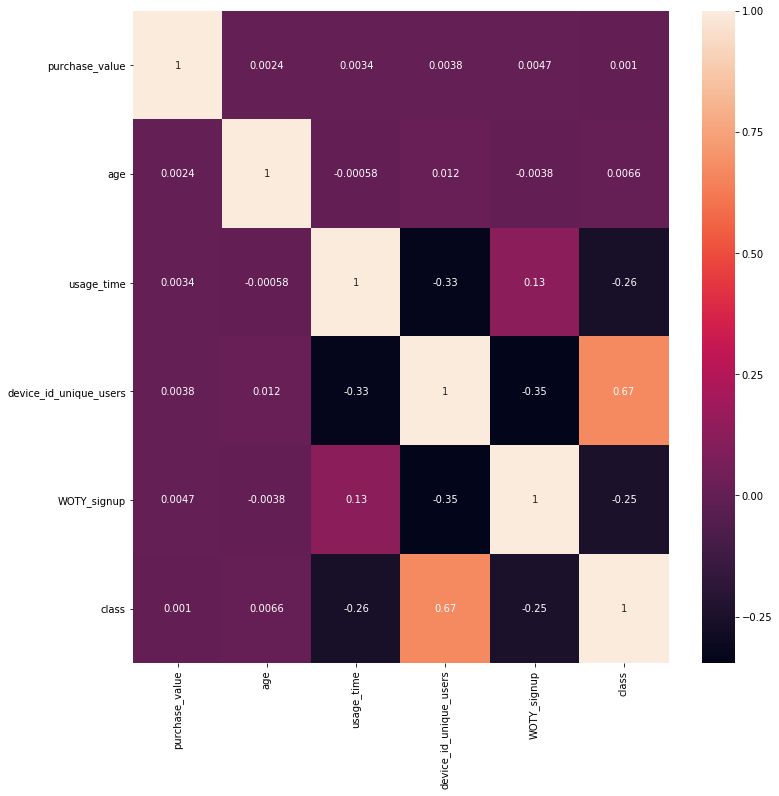

In [68]:
plt.figure(figsize=(12,12))
sns.heatmap(final.corr(), annot=True)

In [69]:
from sklearn.preprocessing import LabelEncoder
data_encoder = final.copy()
data_encoder['source'] = LabelEncoder().fit_transform(data_encoder['source'])
data_encoder['browser'] = LabelEncoder().fit_transform(data_encoder['browser'])
data_encoder['sex'] = LabelEncoder().fit_transform(data_encoder['sex'])
data_encoder['country'] = LabelEncoder().fit_transform(data_encoder['country'])

In [73]:
data_encoder

purchase_value  source  browser  sex  age  country  usage_time  \
0                   34       2        0    1   39       84   4506682.0   
1                   16       0        0    0   53      172     17944.0   
2                   15       2        3    1   53      172         1.0   
3                   44       2        4    1   41      115    492085.0   
4                   39       0        4    1   45      172   4361461.0   
5                   42       0        0    1   18       32   4240931.0   
6                   11       0        0    0   19      115   2177825.0   
7                   27       0        3    1   34      172   4268729.0   
8                   30       2        2    0   43       36   3594200.0   
9                   62       0        2    1   31      172   4943753.0   
10                  13       0        4    0   35      172   9430366.0   
11                  58       1        0    1   32      115   1517036.0   
12                  18       2        4    1   33      115    367824.0   
13                  50       1        4    1   38       24   2826929.0   
14                  15       2        2    1   24      115   5090777.0   
15                  58       2        4    0   24       76   4439501.0   
16                  57       2        1    1   23      172   7598259.0   
17                  55       0        4    1   38      115   1407619.0   
18                  40       0        1    1   24        5   4297125.0   
19                  46       1        1    0   53      171  10253966.0   
20                  24       1        1    0   23      115    981368.0   
21                  47       2        0    1   28      115   4774556.0   
22                  47       2        0    0   24       36   7107676.0   
23                  25       0        2    1   34      172   6944355.0   
24                  52       1        2    0   35      172         1.0   
25                  31       2        1    1   36      172    960070.0   
26                  37       0        2    1   32      172    124072.0   
27                  54       2        0    0   28      172   1445242.0   
28                  12       2        2    1   19      152   8570841.0   
29                  48       2        0    0   27      172         1.0   
...                ...     ...      ...  ...  ...      ...         ...   
151082              90       2        2    1   34       88         1.0   
151083              15       0        2    1   37      171   4110286.0   
151084              52       2        0    1   44      115   7813406.0   
151085              47       2        0    1   21       36   9267146.0   
151086              63       2        4    0   36      172   5411671.0   
151087              21       0        4    0   21      172  10329226.0   
151088              18       2        0    1   30      119   3219306.0   
151089              43       2        2    1   34       36   9700788.0   
151090              29       0        0    0   38       84   8179032.0   
151091              26       1        4    0   22      172   3209637.0   
151092              50       2        1    1   32      135   1643071.0   
151093              38       2        0    1   31      172   4644695.0   
151094              34       2        4    0   30        7   3563184.0   
151095              41       2        1    0   23       27   5642990.0   
151096              43       1        3    0   30      115   6087537.0   
151097              16       2        0    0   28      172   5413895.0   
151098              55       0        0    0   49      115   2958034.0   
151099              61       1        2    1   24       35         1.0   
151100              48       2        1    0   31      115   2004558.0   
151101              63       2        4    1   46      172   9368483.0   
151102              41       2        0    1   26      172   7981807.0   
151103              27       1        0    1   39      165         1.0   
151104      

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_=data_encoder.drop(['class'],axis=1)
y_=data_encoder['class']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state = 42, stratify = y, test_size = 0.3)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap = True, max_features = 'auto', 
                            min_samples_leaf = 10, n_estimators = 100, min_samples_split = 2)

In [78]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
y_pred = rf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve, auc

In [81]:
roc_auc_score(y_test, y_pred)

0.7665488810365135

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.70      4245

   micro avg       0.96      0.96      0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[41089,     0],
       [ 1982,  2263]], dtype=int64)